In [37]:
#ForestFires

In [38]:
!pip install tensorflow

In [39]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='darkgrid',palette='viridis')
from pandas import read_csv
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

In [40]:
#Read The Datset
df = pd.read_csv('https://raw.githubusercontent.com/KJanhavi2424/My-Datasets/main/forestfires.csv')
df

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0           0         0         0         1         0         0         0   
1           0         0         0         0         0         0         1   
2           0         0         0         0         0         0         1   
3           0         0         0         1         0         0         0   
4           0         0         0         1         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         1         0   

     monthsep  size_category  
0           0          small  
1           0          small  
2           0          small  
3           0          small  
4           0          small  
..        ...            ...  
512         0          large  
513         0          large  
514         0          large  
515         0          small  
516         0          small  

[517 rows x 31 columns]

In [41]:
df2 = df.drop(columns=['month','day','monthfeb','monthjan','monthjul','monthjun','monthmar','monthmay','monthnov','monthoct','dayfri','monthapr','monthaug','monthdec','monthsep','daymon','daysat','daysun','daythu','daytue','daywed'])
df2

FFMC    DMC     DC   ISI  temp  RH  wind  rain   area size_category
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00         small
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00         small
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00         small
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00         small
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00         small
..    ...    ...    ...   ...   ...  ..   ...   ...    ...           ...
512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44         large
513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29         large
514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16         large
515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00         small
516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00         small

[517 rows x 10 columns]

In [42]:
df2.describe()

FFMC         DMC          DC         ISI        temp          RH  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean    90.644681  110.872340  547.940039    9.021663   18.889168   44.288201   
std      5.520111   64.046482  248.066192    4.559477    5.806625   16.317469   
min     18.700000    1.100000    7.900000    0.000000    2.200000   15.000000   
25%     90.200000   68.600000  437.700000    6.500000   15.500000   33.000000   
50%     91.600000  108.300000  664.200000    8.400000   19.300000   42.000000   
75%     92.900000  142.400000  713.900000   10.800000   22.800000   53.000000   
max     96.200000  291.300000  860.600000   56.100000   33.300000  100.000000   

             wind        rain         area  
count  517.000000  517.000000   517.000000  
mean     4.017602    0.021663    12.847292  
std      1.791653    0.295959    63.655818  
min      0.400000    0.000000     0.000000  
25%      2.700000    0.000000     0.000000  
50%      4.000000    0.000000     0.520000  
75%      4.900000    0.000000     6.570000  
max      9.400000    6.400000  1090.840000

In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(1)
memory usage: 40.5+ KB


In [44]:
#Artificial Neural Network(ANN)

In [45]:
x = df2.iloc[:,:-1]
y = df2.iloc[:,-1]

In [46]:
sc = StandardScaler()

In [47]:
x = sc.fit_transform(x)
x

array([[-0.80595947, -1.32332557, -1.83047676, ...,  1.49861442,
        -0.07326831, -0.20201979],
       [-0.00810203, -1.17954077,  0.48889092, ..., -1.74175564,
        -0.07326831, -0.20201979],
       [-0.00810203, -1.04982188,  0.56071545, ..., -1.51828184,
        -0.07326831, -0.20201979],
       ...,
       [-1.64008316, -0.84664771,  0.47476811, ...,  1.49861442,
        -0.07326831, -0.02653216],
       [ 0.68095666,  0.54900254,  0.26938221, ..., -0.00983371,
        -0.07326831, -0.20201979],
       [-2.02087875, -1.68591332, -1.78044169, ...,  0.26950853,
        -0.07326831, -0.20201979]])

In [48]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [52]:
#Initialize the ann
ann = Sequential()

#Create the Hidden Layer
ann.add(Dense(units=10,activation='relu'))

#Create the output layer
ann.add(Dense(units=1,activation='sigmoid'))

#Establish the connection between all the layers
ann.compile(optimizer='adadelta',loss='binary_crossentropy',metrics='accuracy')


In [56]:
ypred = ann.predict(xtest)
ypred

4/4 [==============================] - 0s 4ms/step


array([[0.38740098],
       [0.55683345],
       [0.3072995 ],
       [0.34635362],
       [0.6341897 ],
       [0.26913124],
       [0.46826065],
       [0.5097089 ],
       [0.2530692 ],
       [0.37428924],
       [0.36880693],
       [0.671641  ],
       [0.42954236],
       [0.49001104],
       [0.7111348 ],
       [0.6807017 ],
       [0.65247214],
       [0.5834675 ],
       [0.9122268 ],
       [0.18889032],
       [0.40546644],
       [0.29267174],
       [0.5264113 ],
       [0.5279477 ],
       [0.65116775],
       [0.59465253],
       [0.648395  ],
       [0.30314463],
       [0.6750122 ],
       [0.38919032],
       [0.3153524 ],
       [0.517049  ],
       [0.5663072 ],
       [0.5518435 ],
       [0.49519655],
       [0.6428984 ],
       [0.5845437 ],
       [0.3877914 ],
       [0.38630146],
       [0.4148797 ],
       [0.55946857],
       [0.4414888 ],
       [0.54244226],
       [0.48349807],
       [0.42081836],
       [0.6093775 ],
       [0.20156062],
       [0.370

In [57]:
ypred = ypred>0.5

In [58]:
ypred

array([[False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [

In [59]:
ytest

270    small
90     small
133    small
221    large
224    large
       ...  
438    large
11     small
358    small
92     small
362    small
Name: size_category, Length: 104, dtype: object

In [82]:
#Visualizations

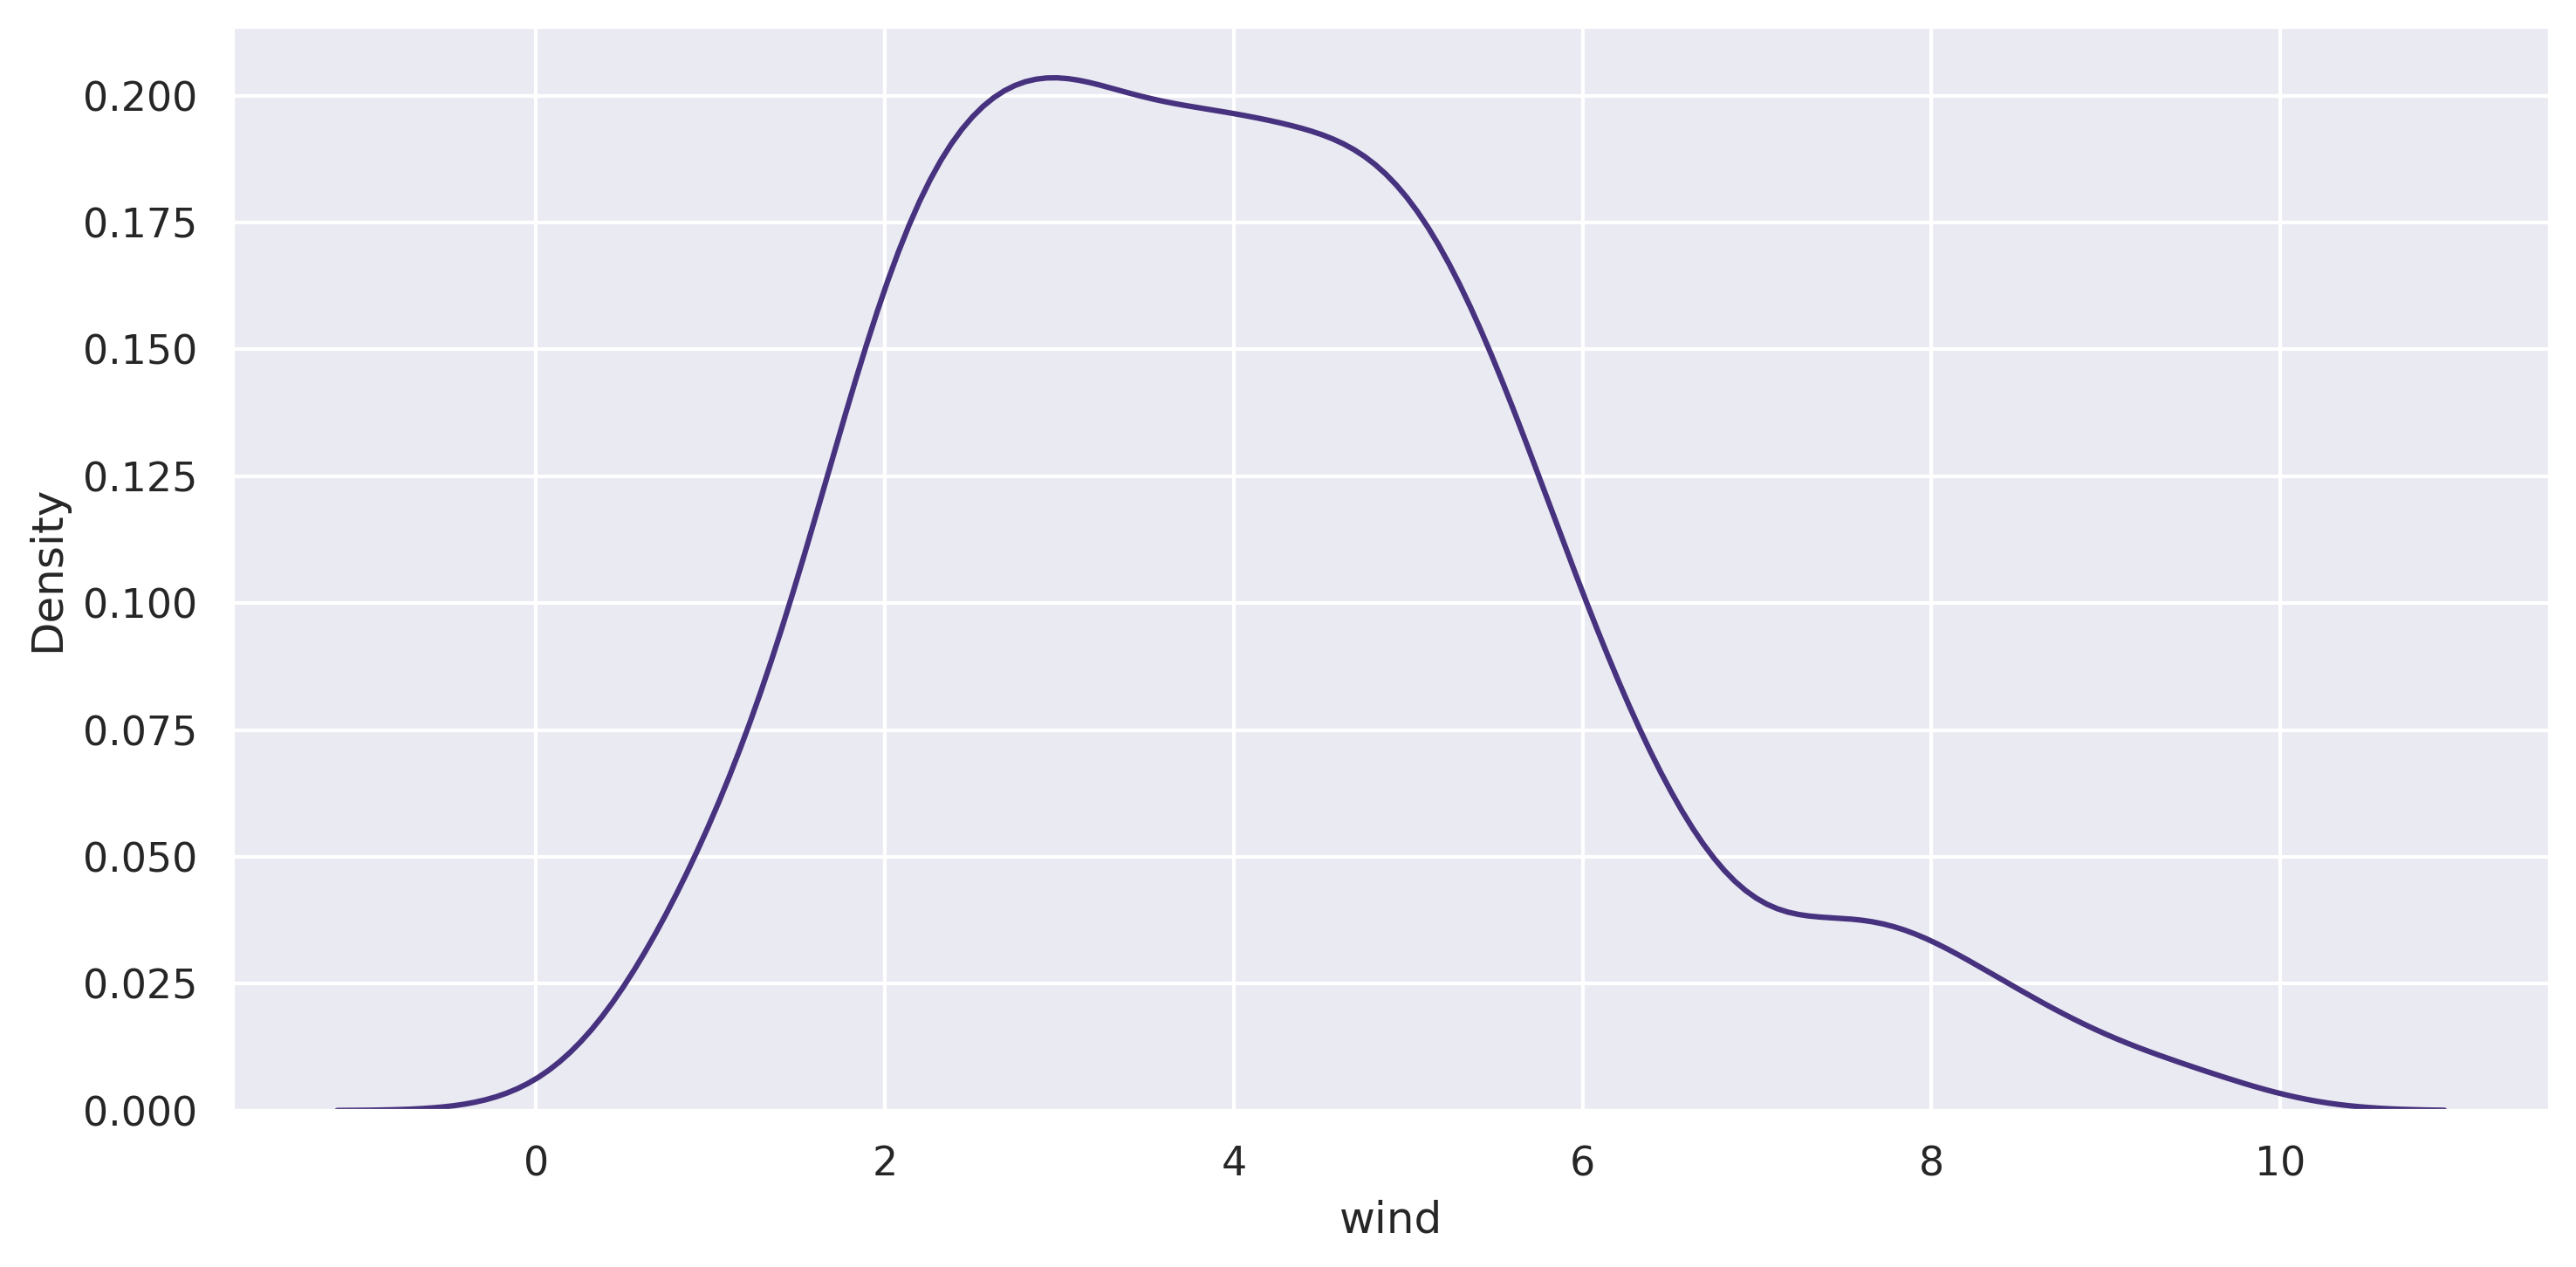

In [83]:
sns.kdeplot(df2['wind'])
plt.tight_layout()
plt.show()

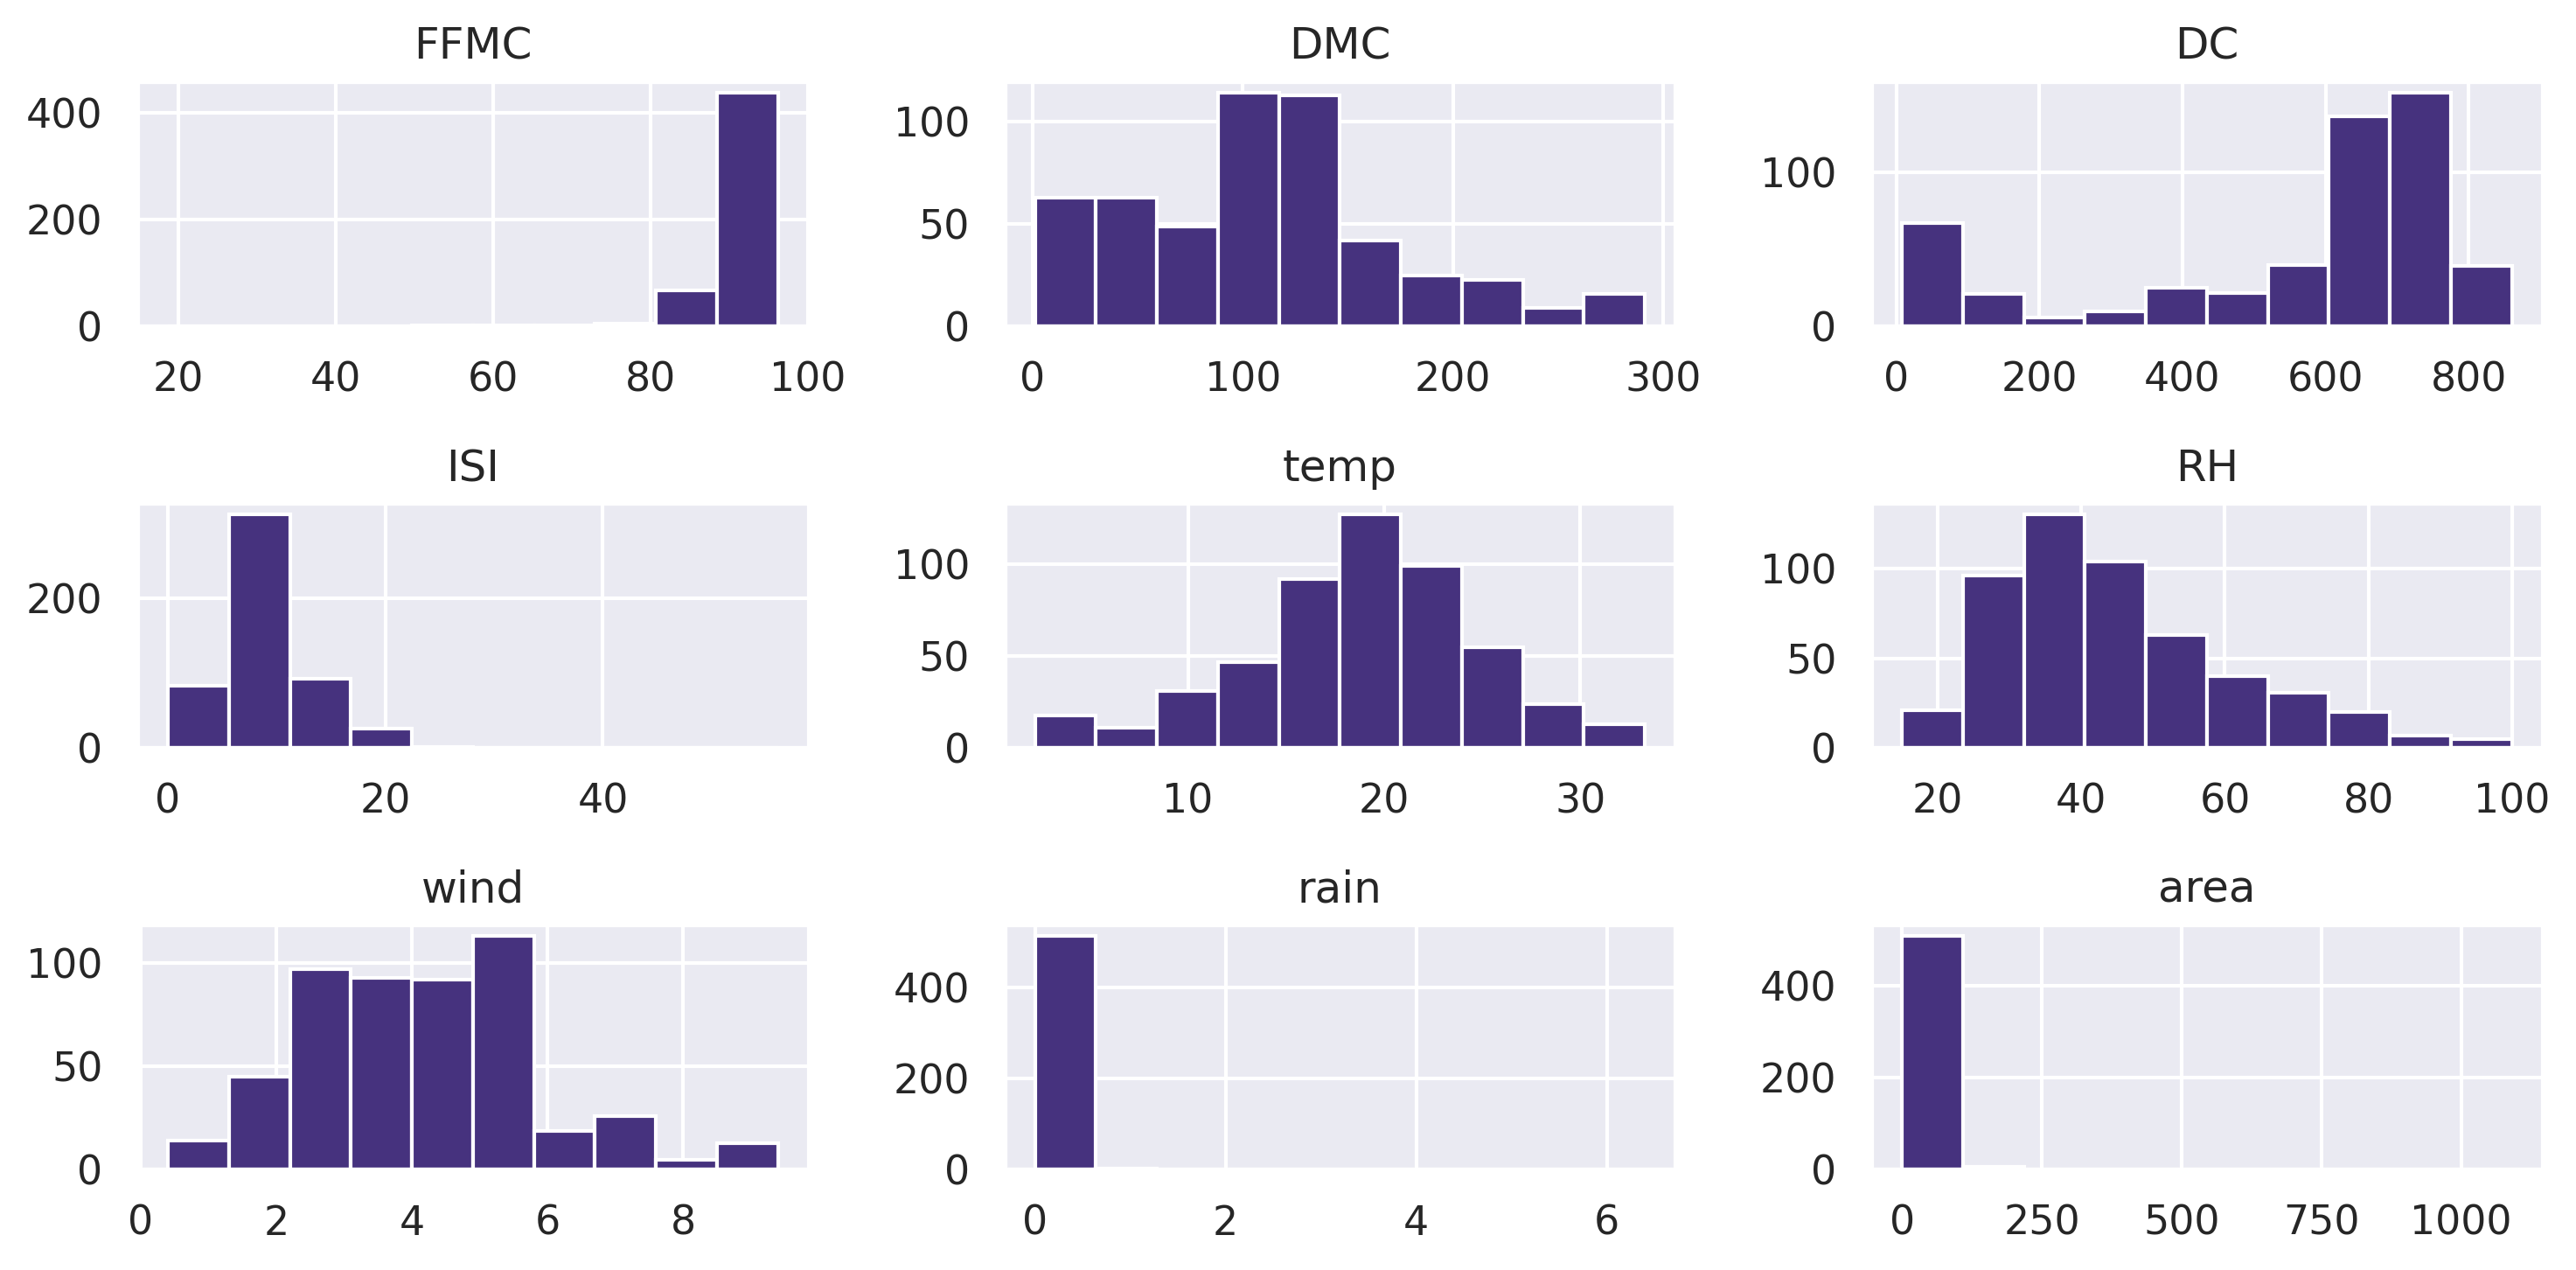

In [84]:
#Histogram and Densityplot
df2.hist()
plt.tight_layout()
plt.show()

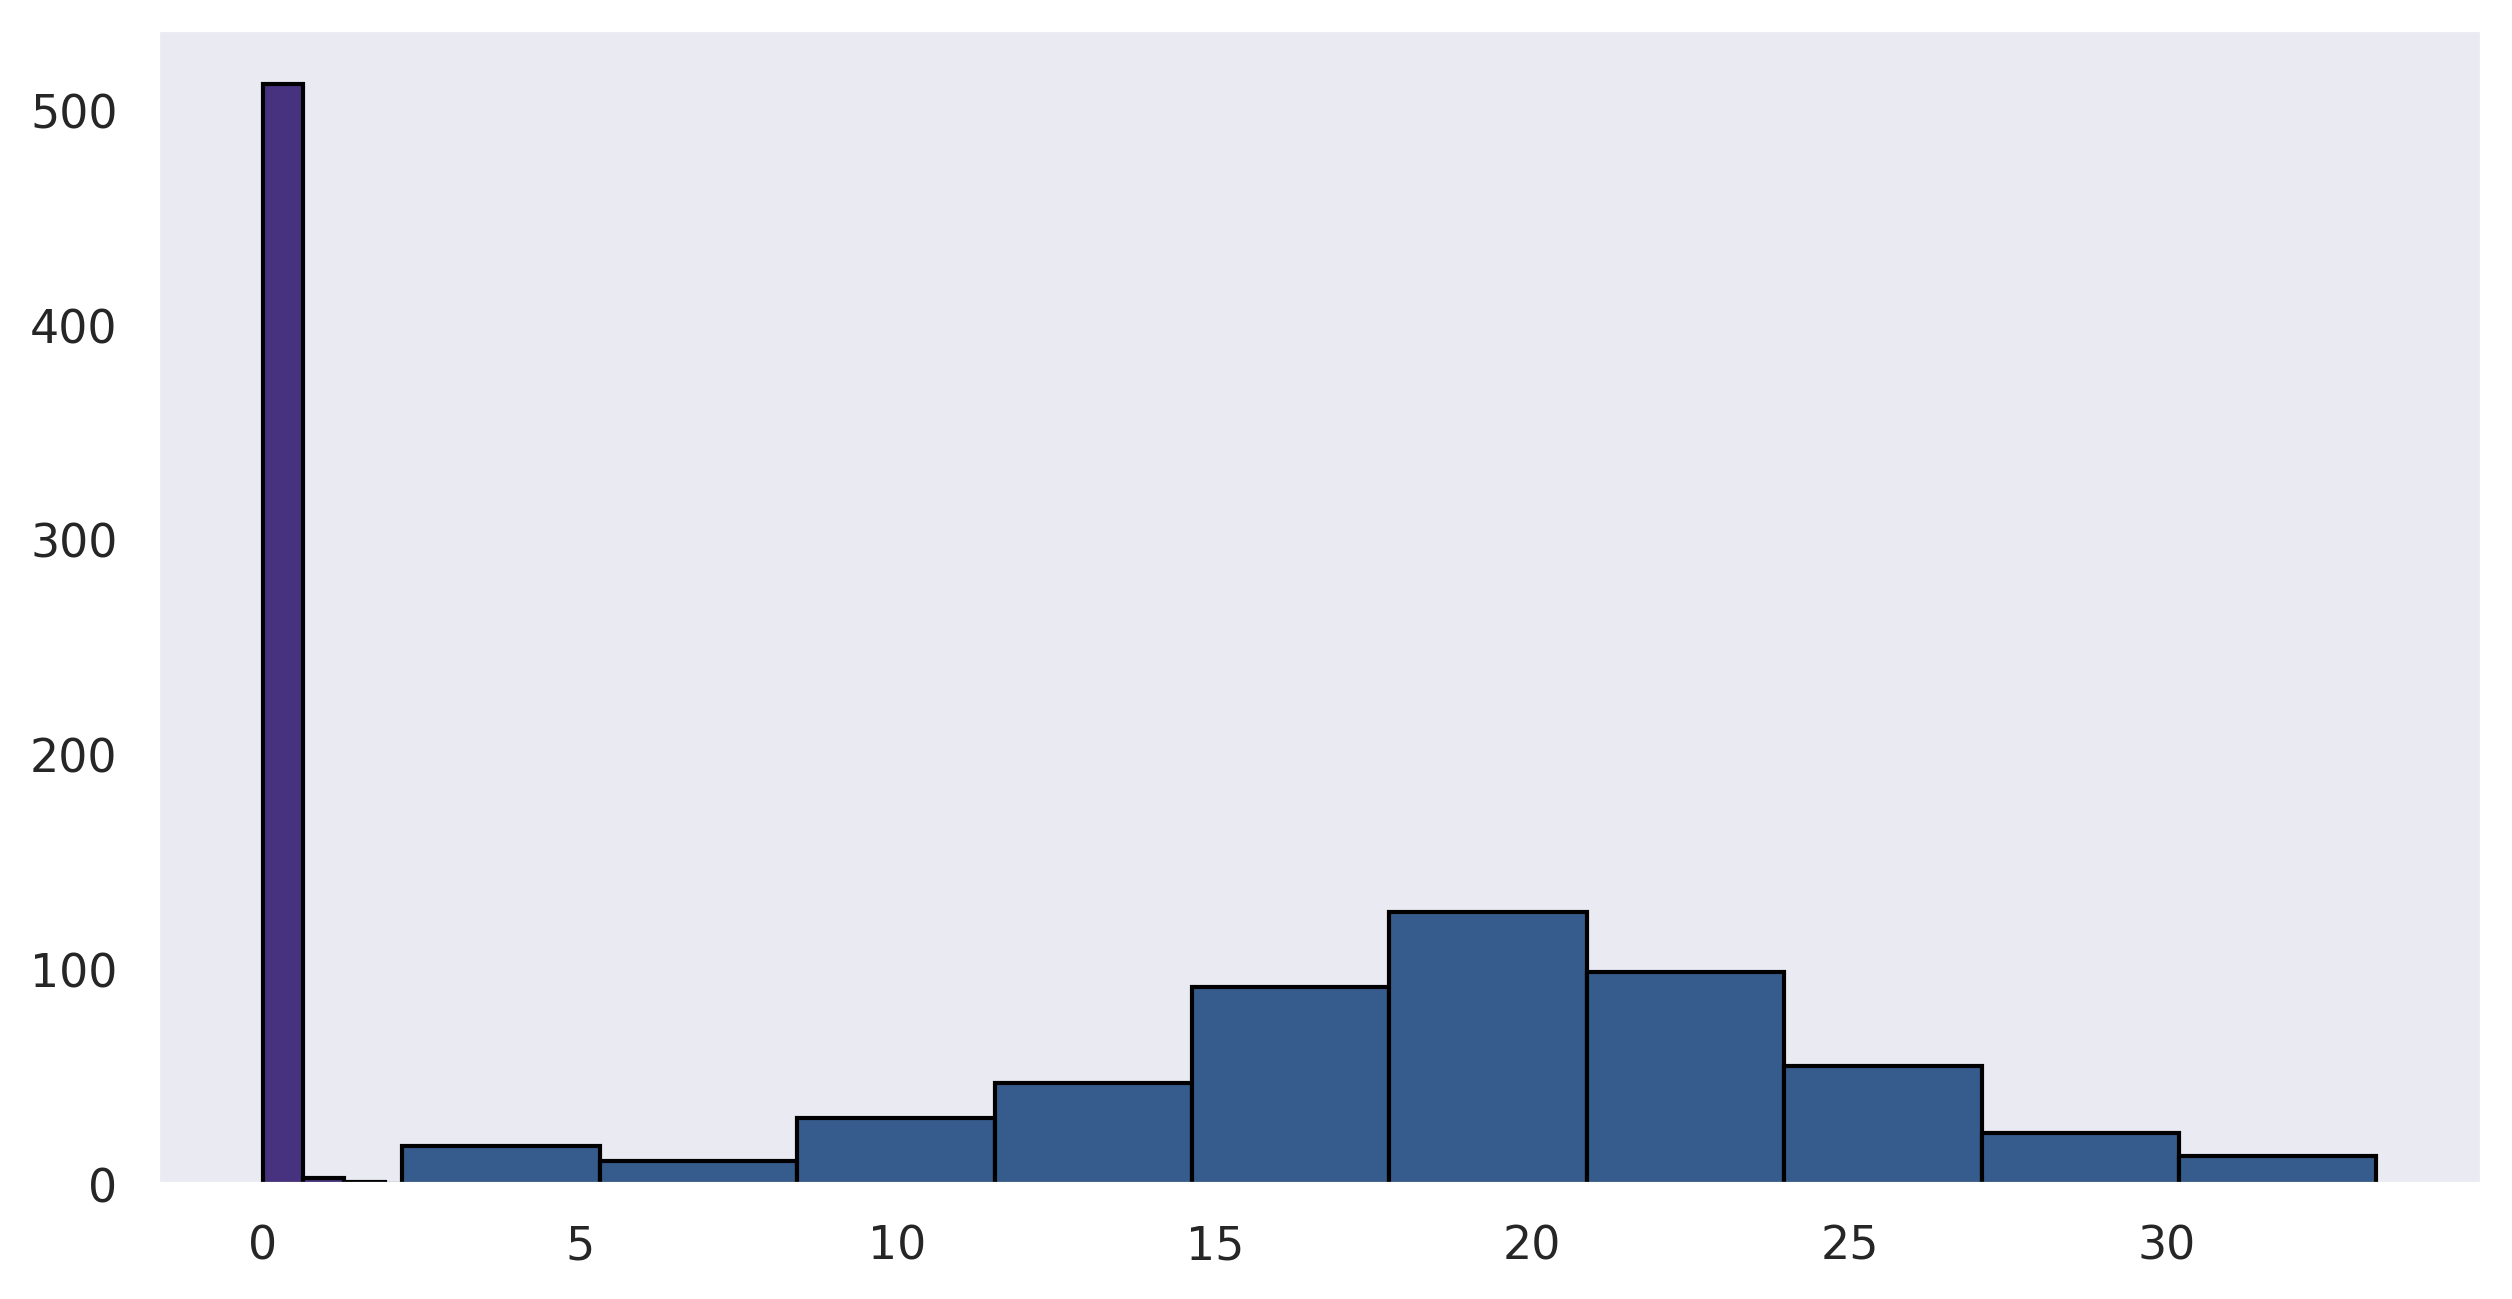

In [85]:
plt.hist(df2['rain'],edgecolor='black')
plt.hist(df2['temp'],edgecolor='black')
plt.grid()

<Axes: >

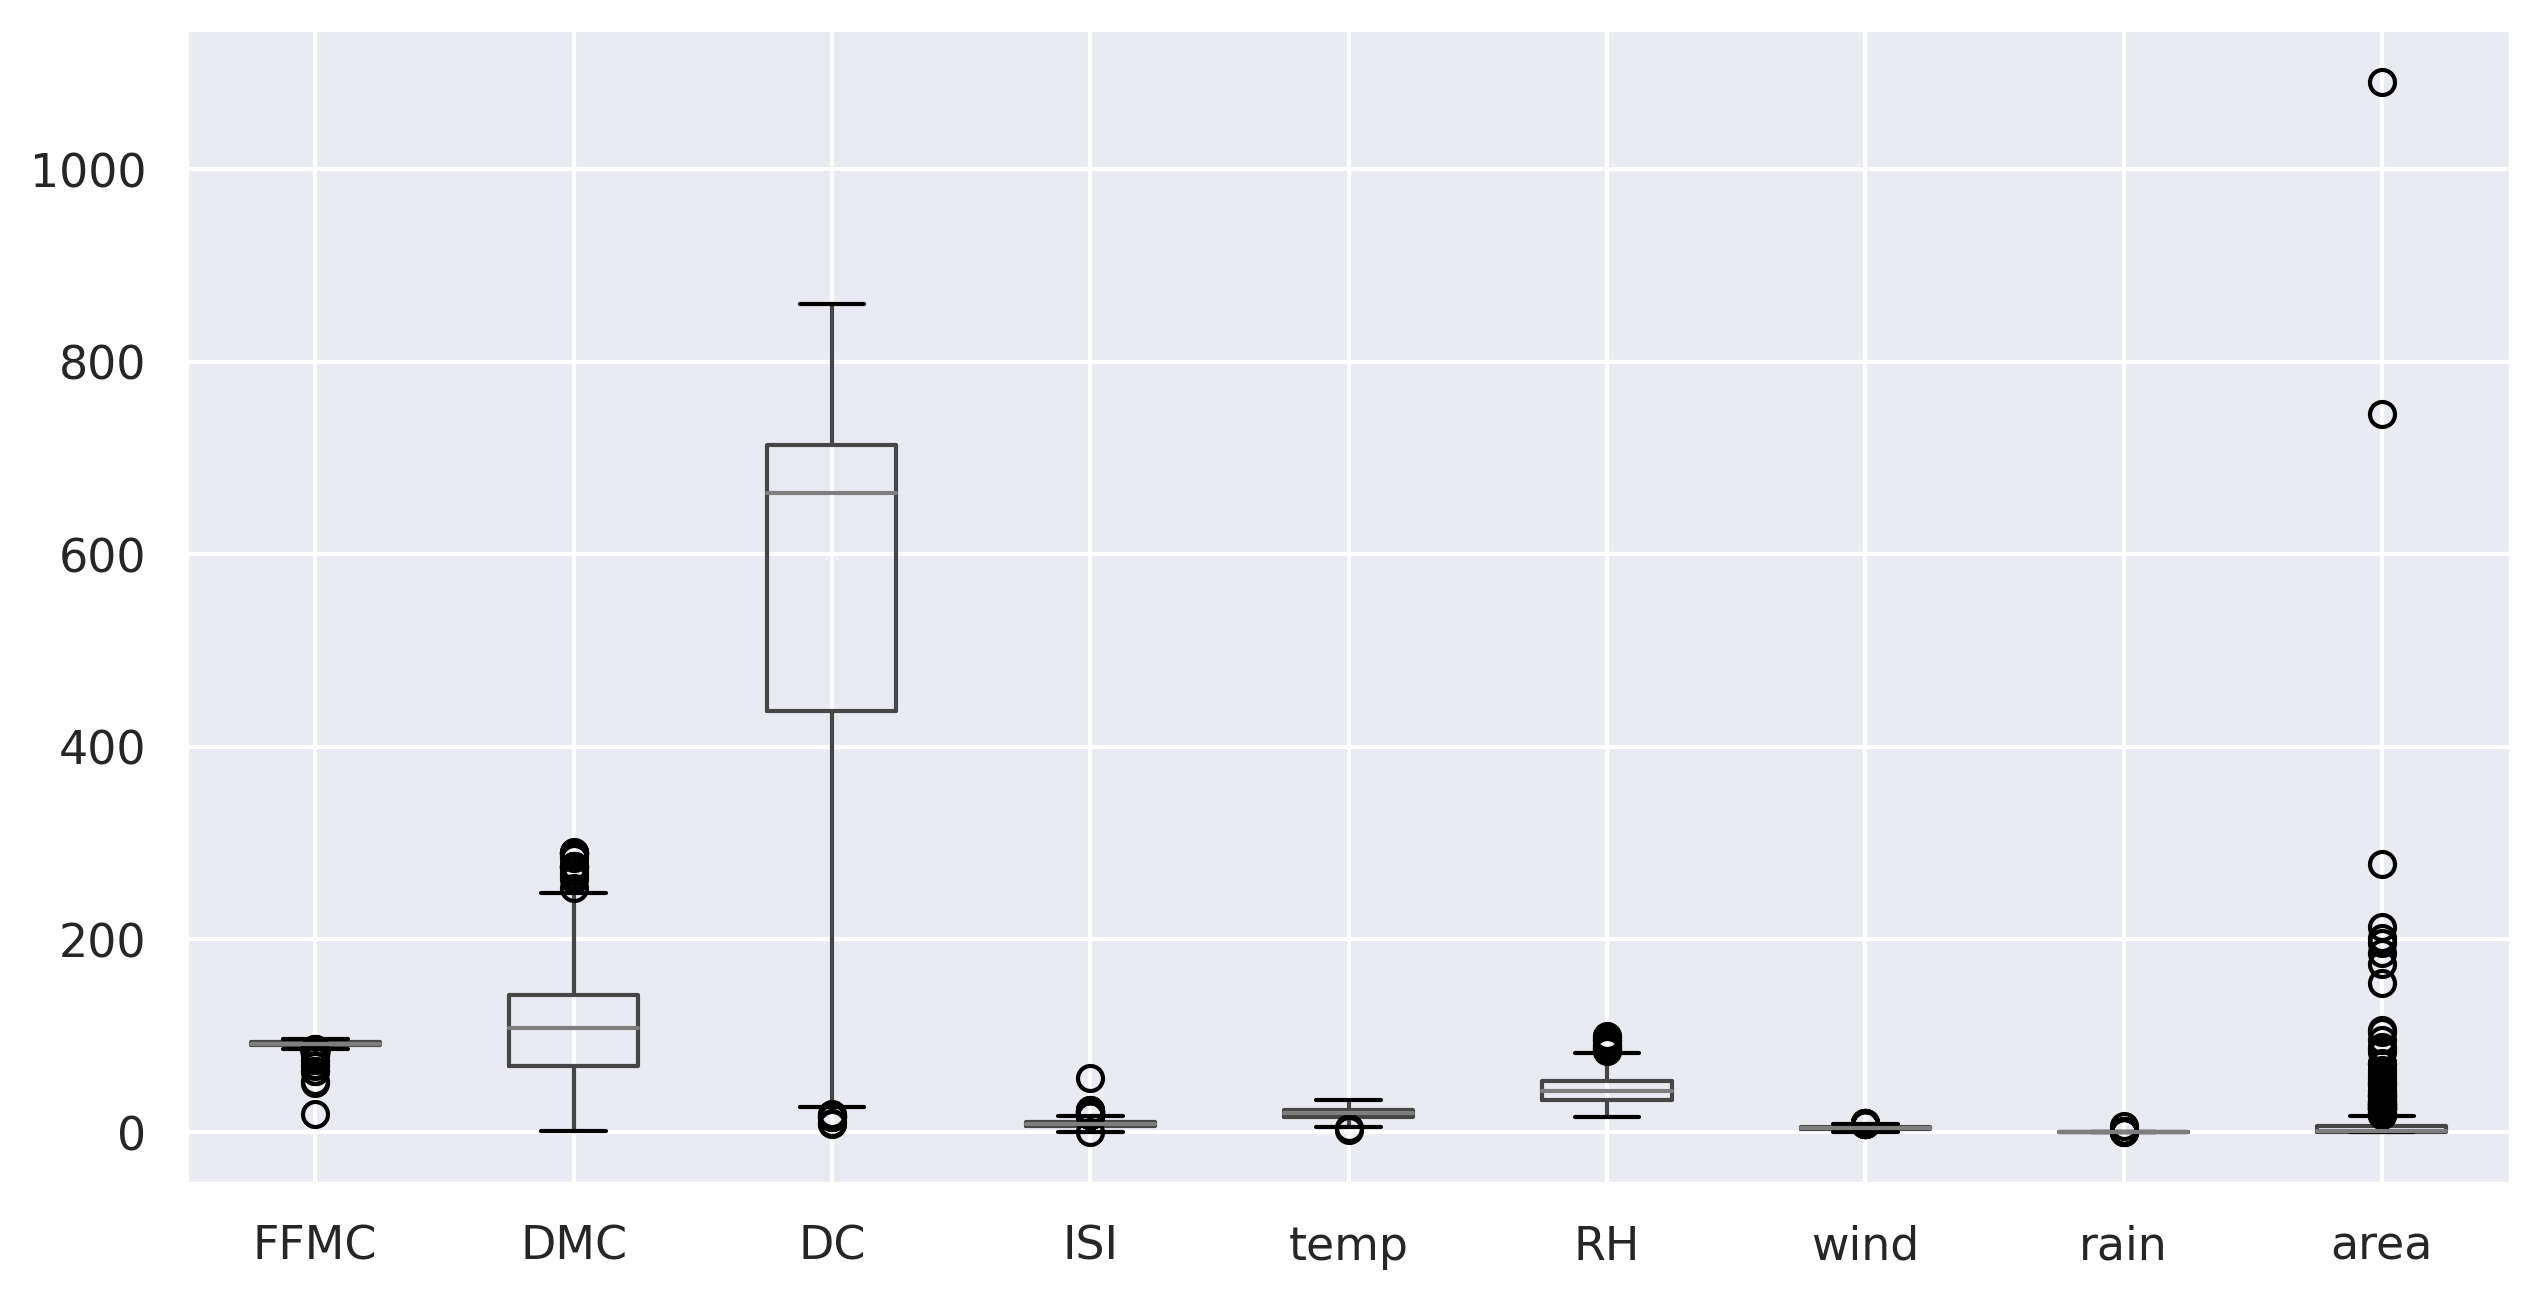

In [86]:
df2.boxplot()

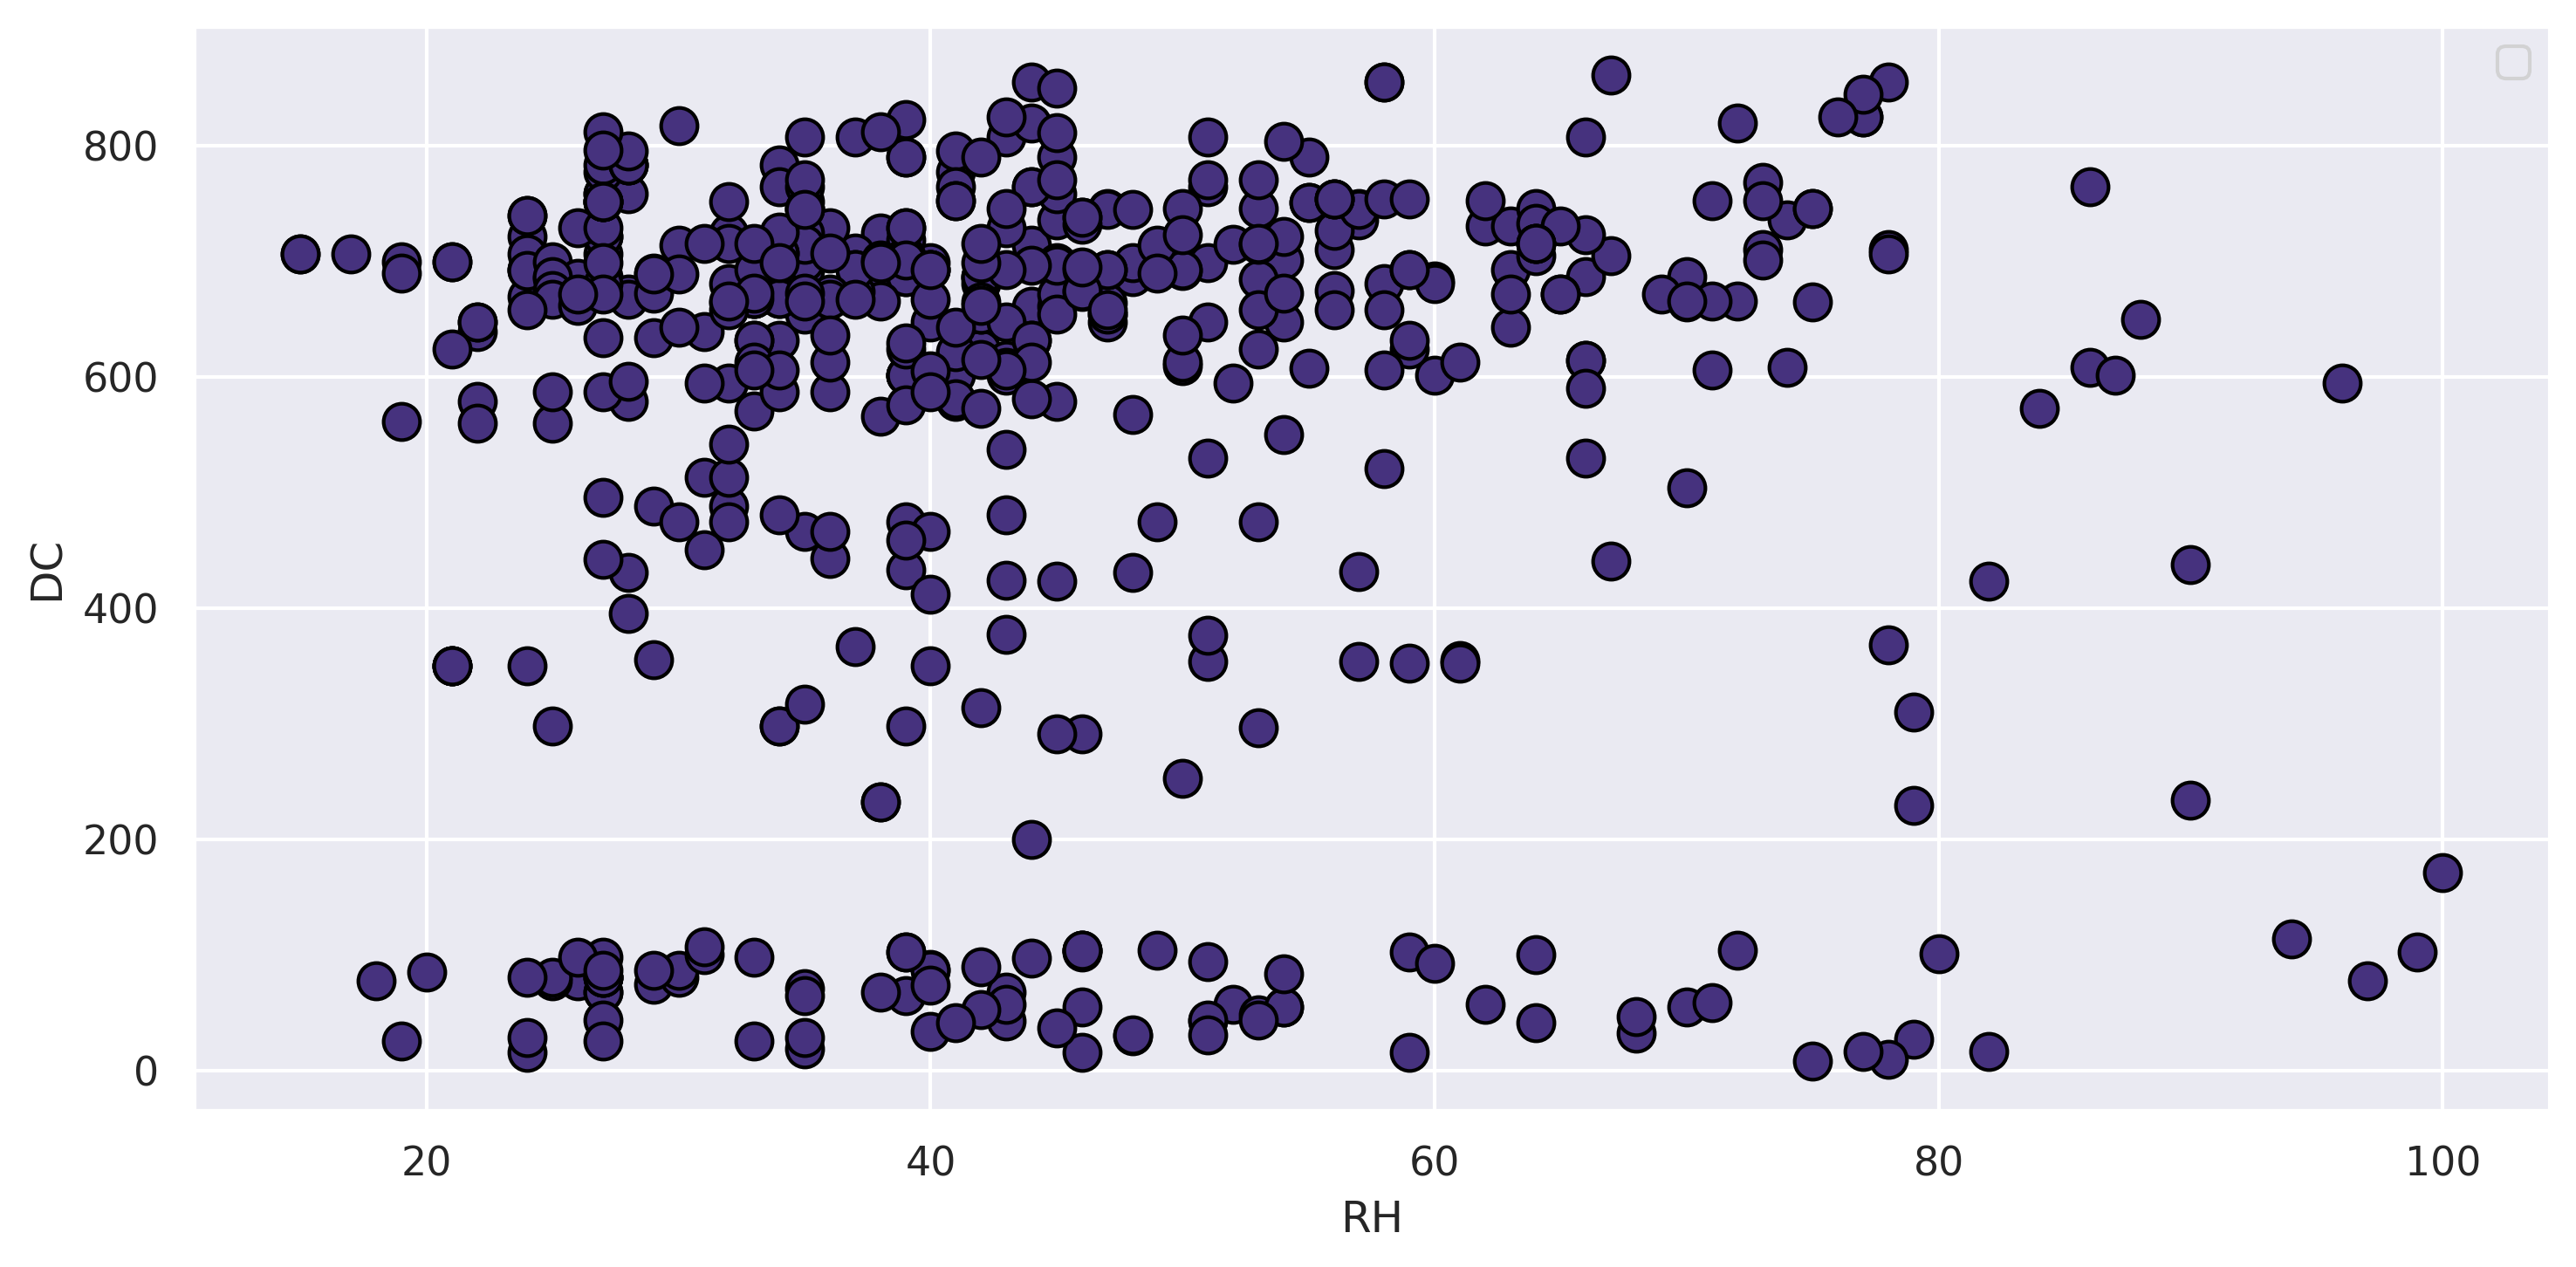

In [87]:
plt.scatter(df2['RH'],df2['DC'],s=100,edgecolors='black')
plt.xlabel('RH')
plt.ylabel('DC')
plt.tight_layout()
plt.legend()

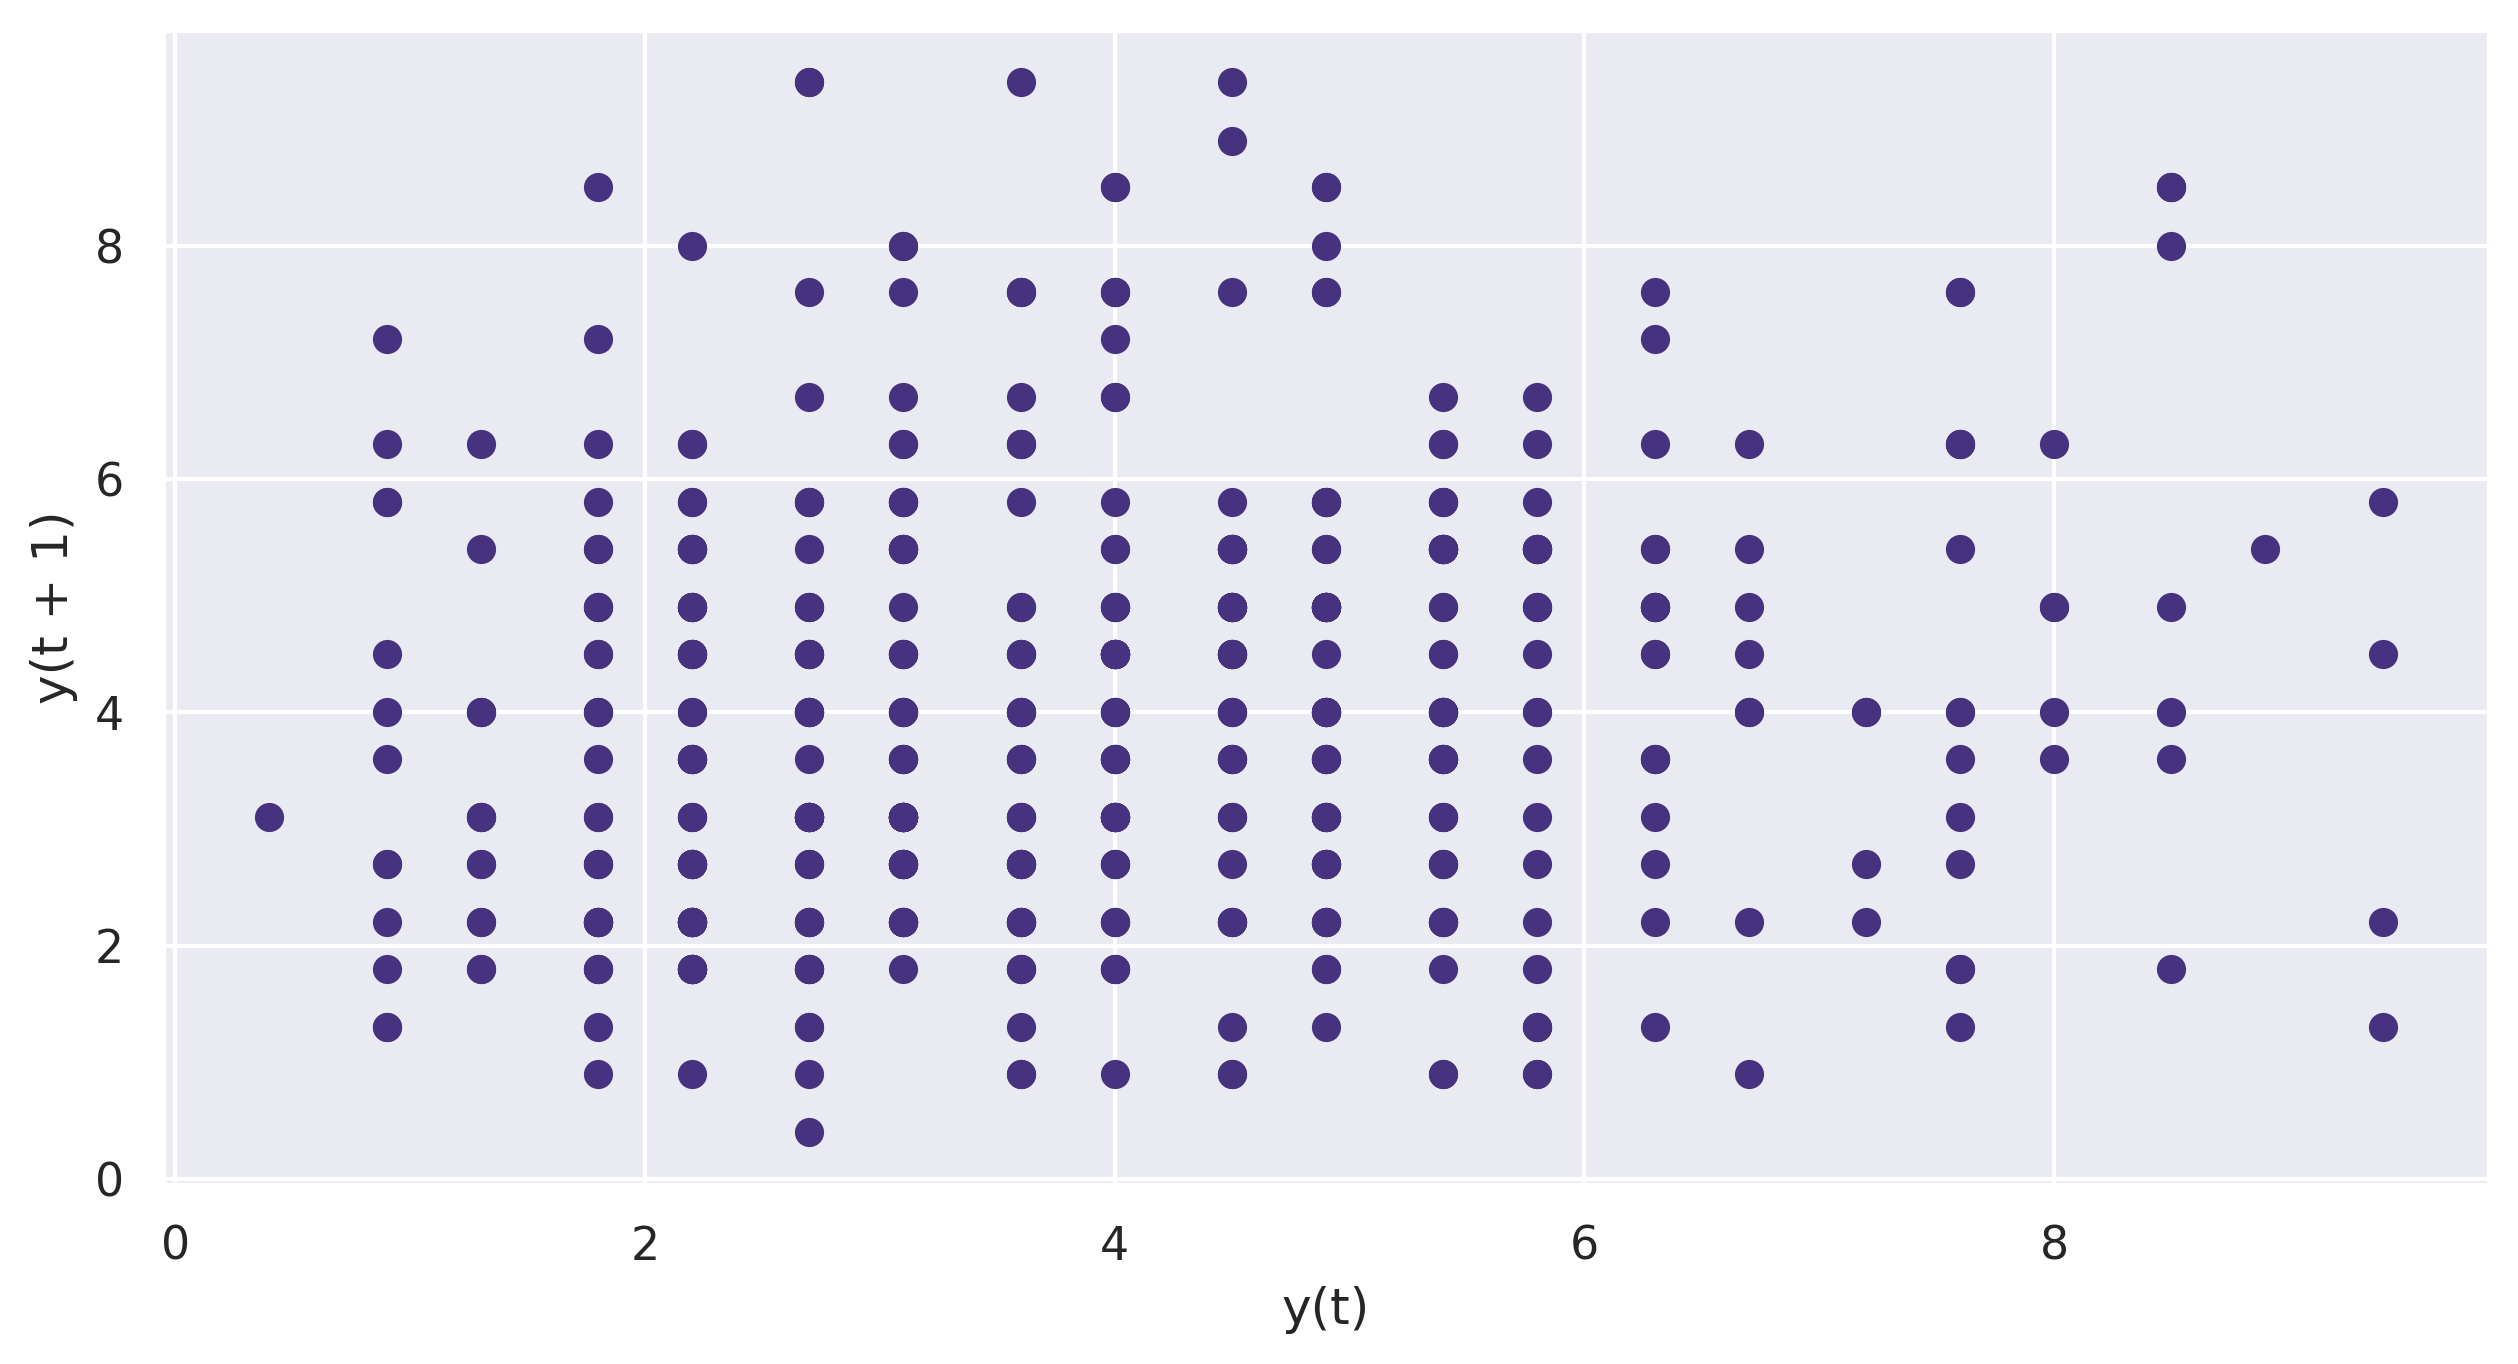

In [88]:
#Lag Plot
lag_plot(df2['wind'])
plt.show()

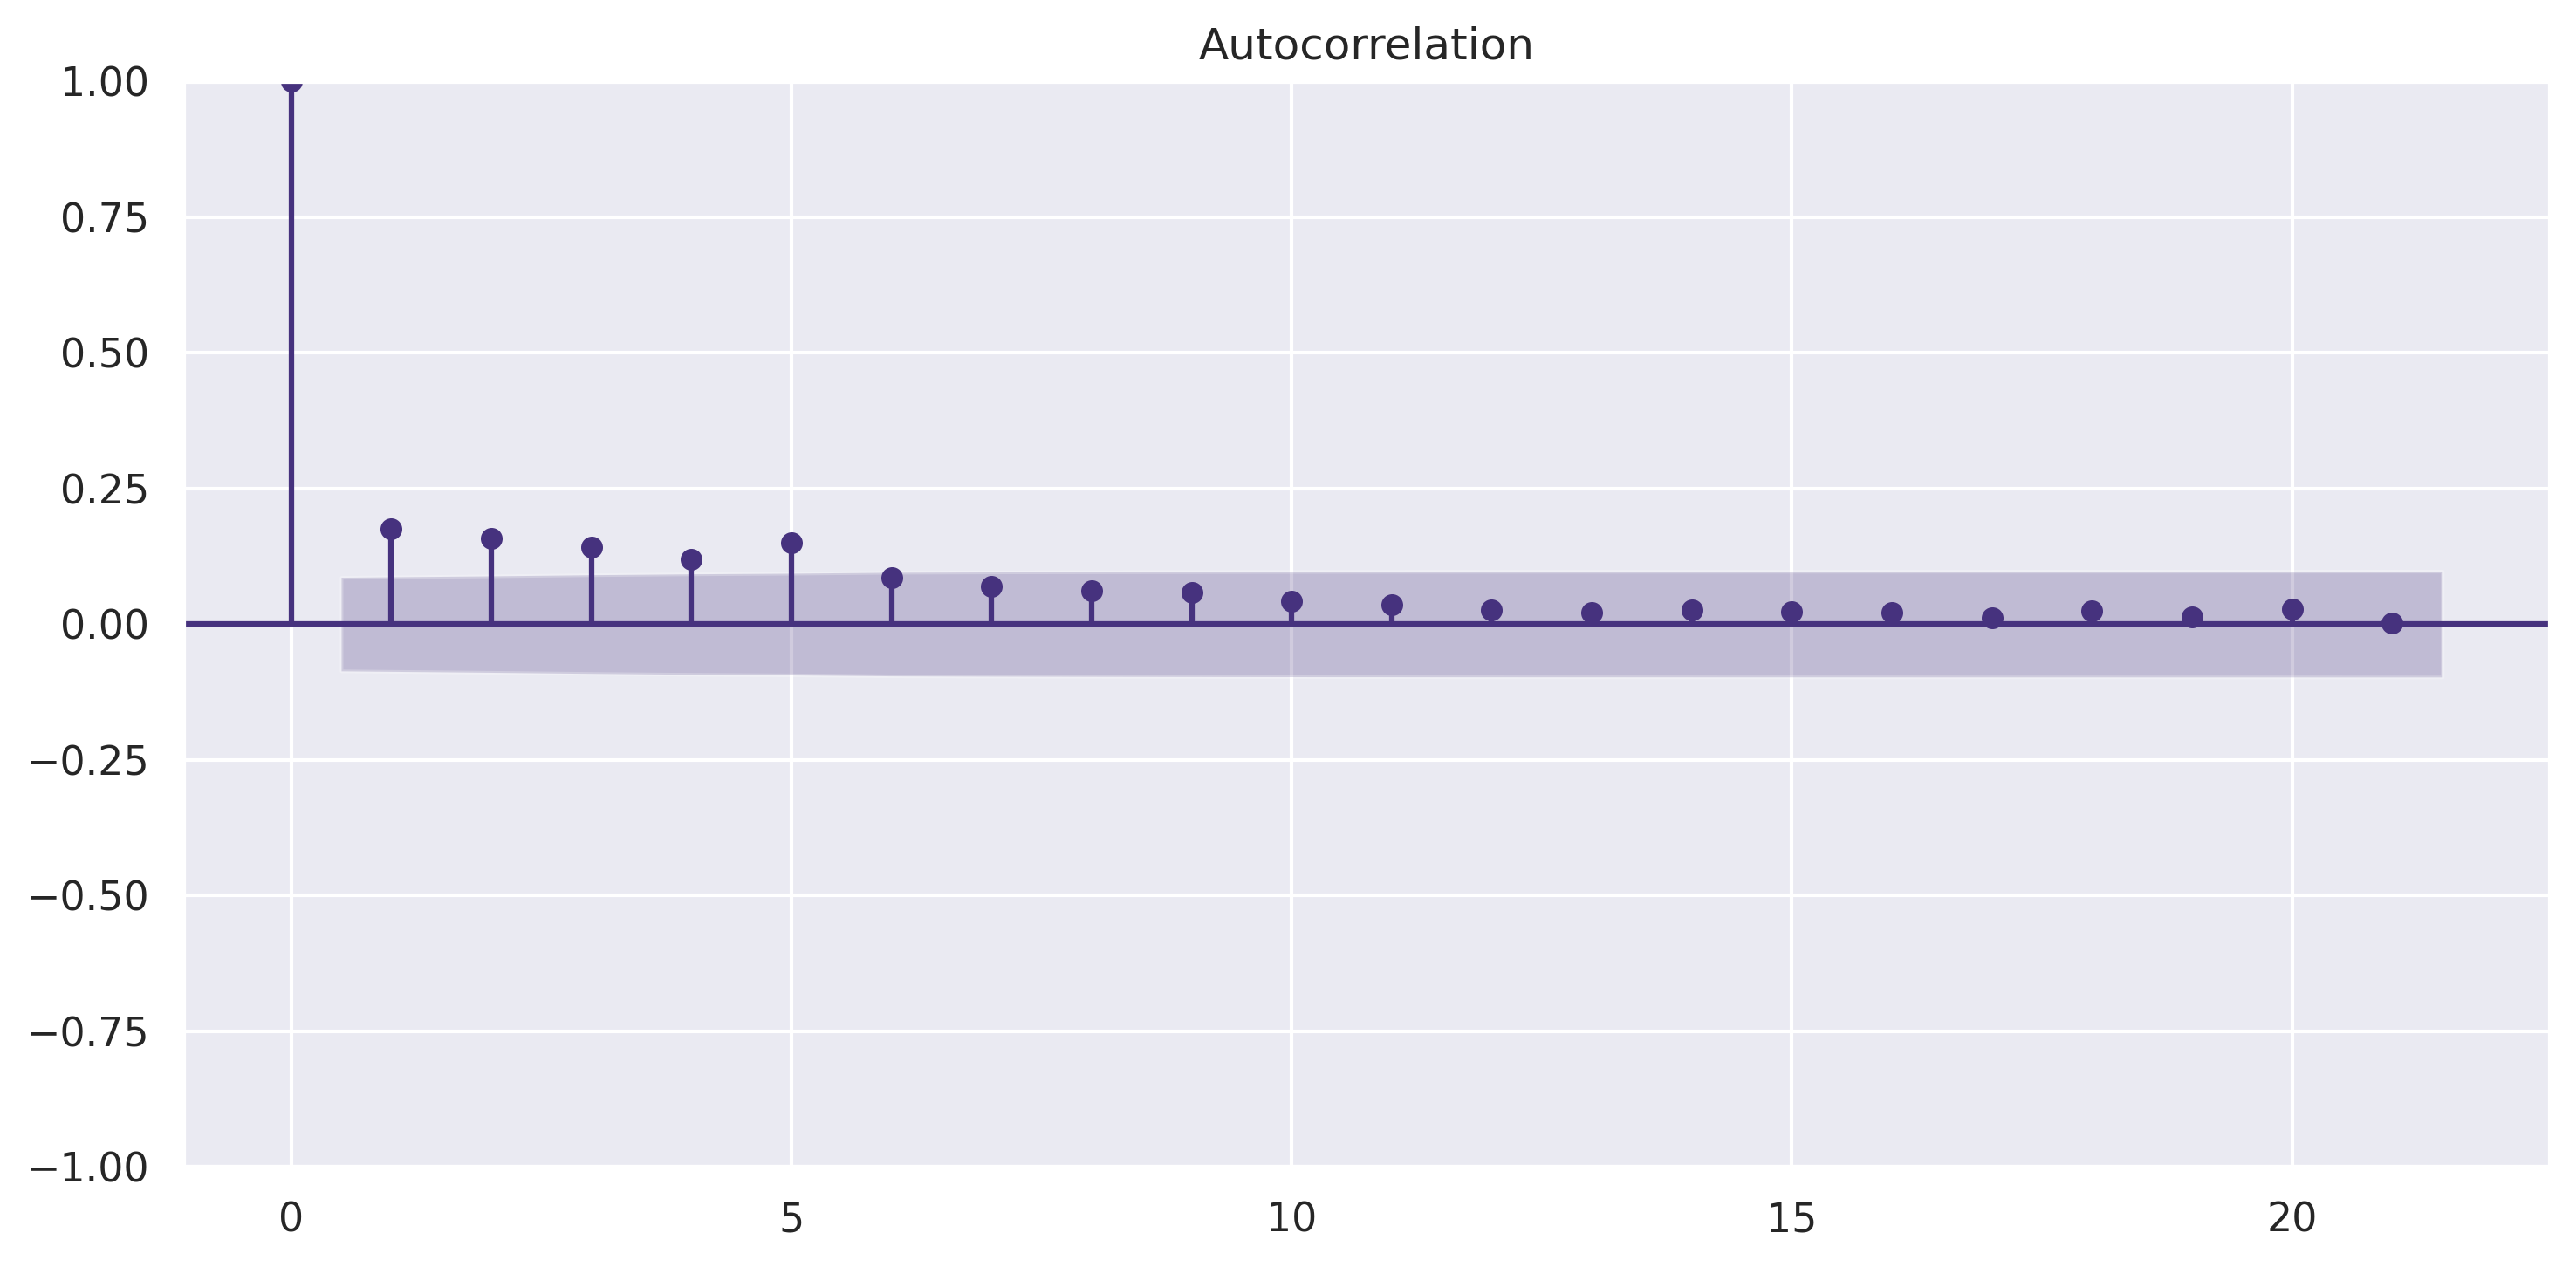

In [89]:
#Autocorrelation Plot
plot_acf(df2['area'],lags=21)
plt.tight_layout()
plt.show()

<Axes: xlabel='wind', ylabel='count'>

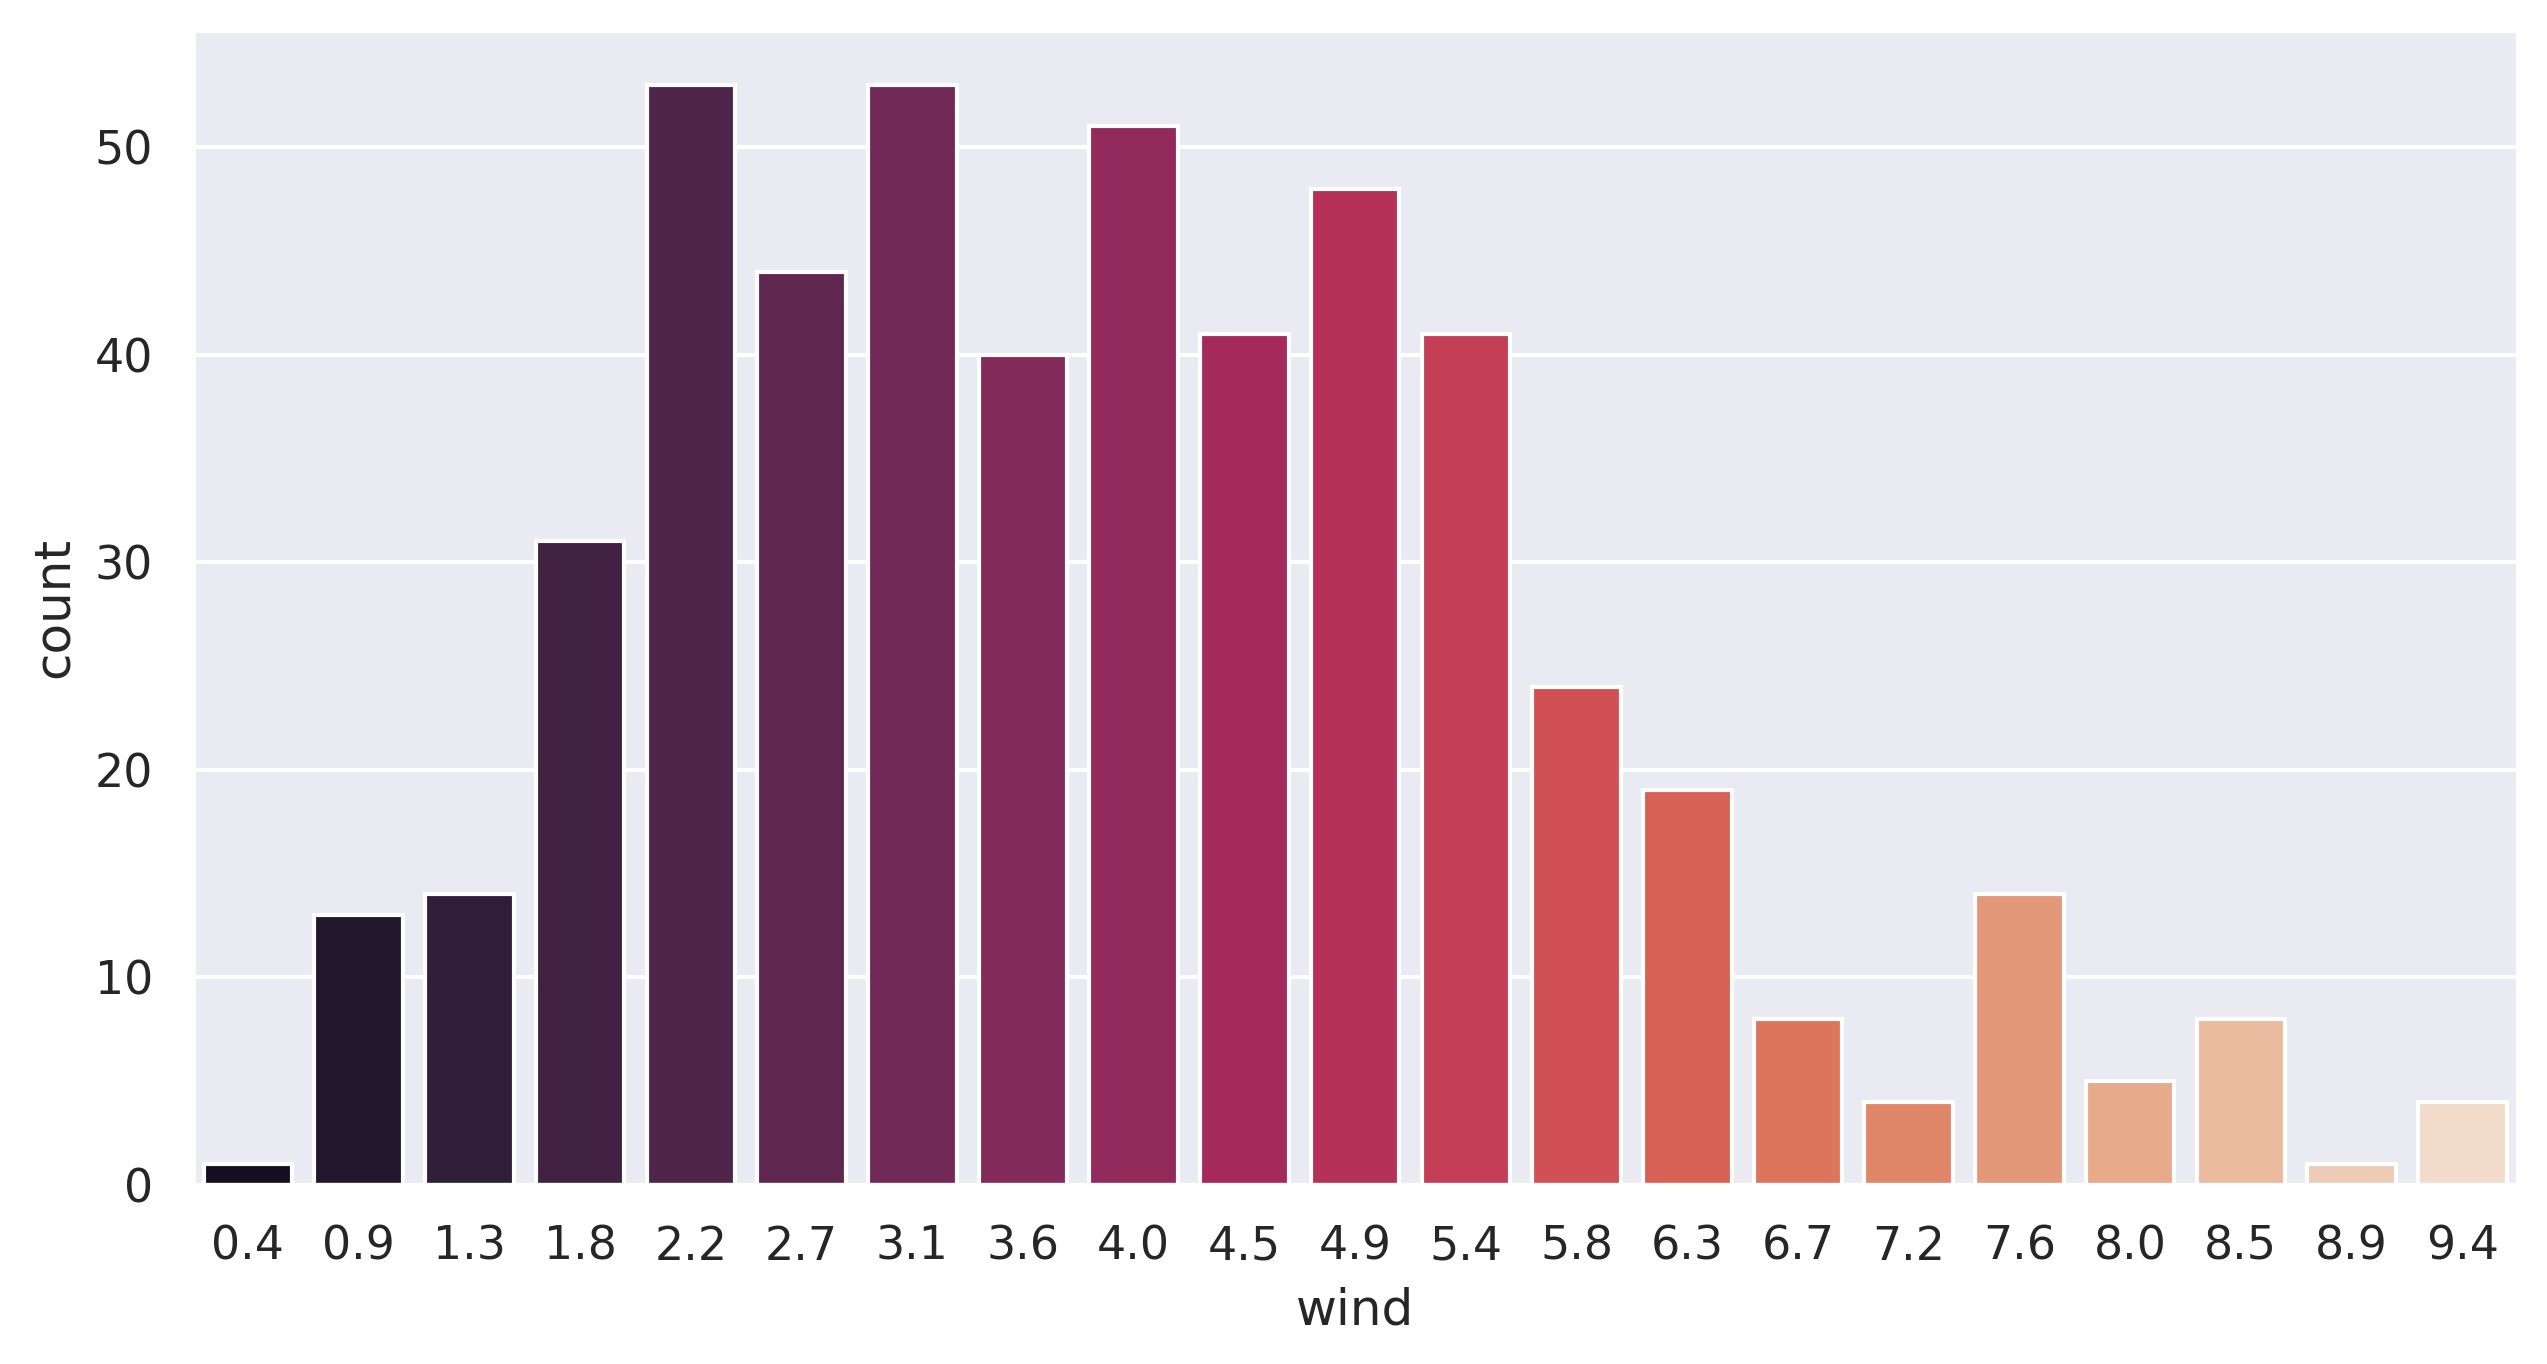

In [90]:
sns.countplot(x=df2['wind'],palette='rocket')

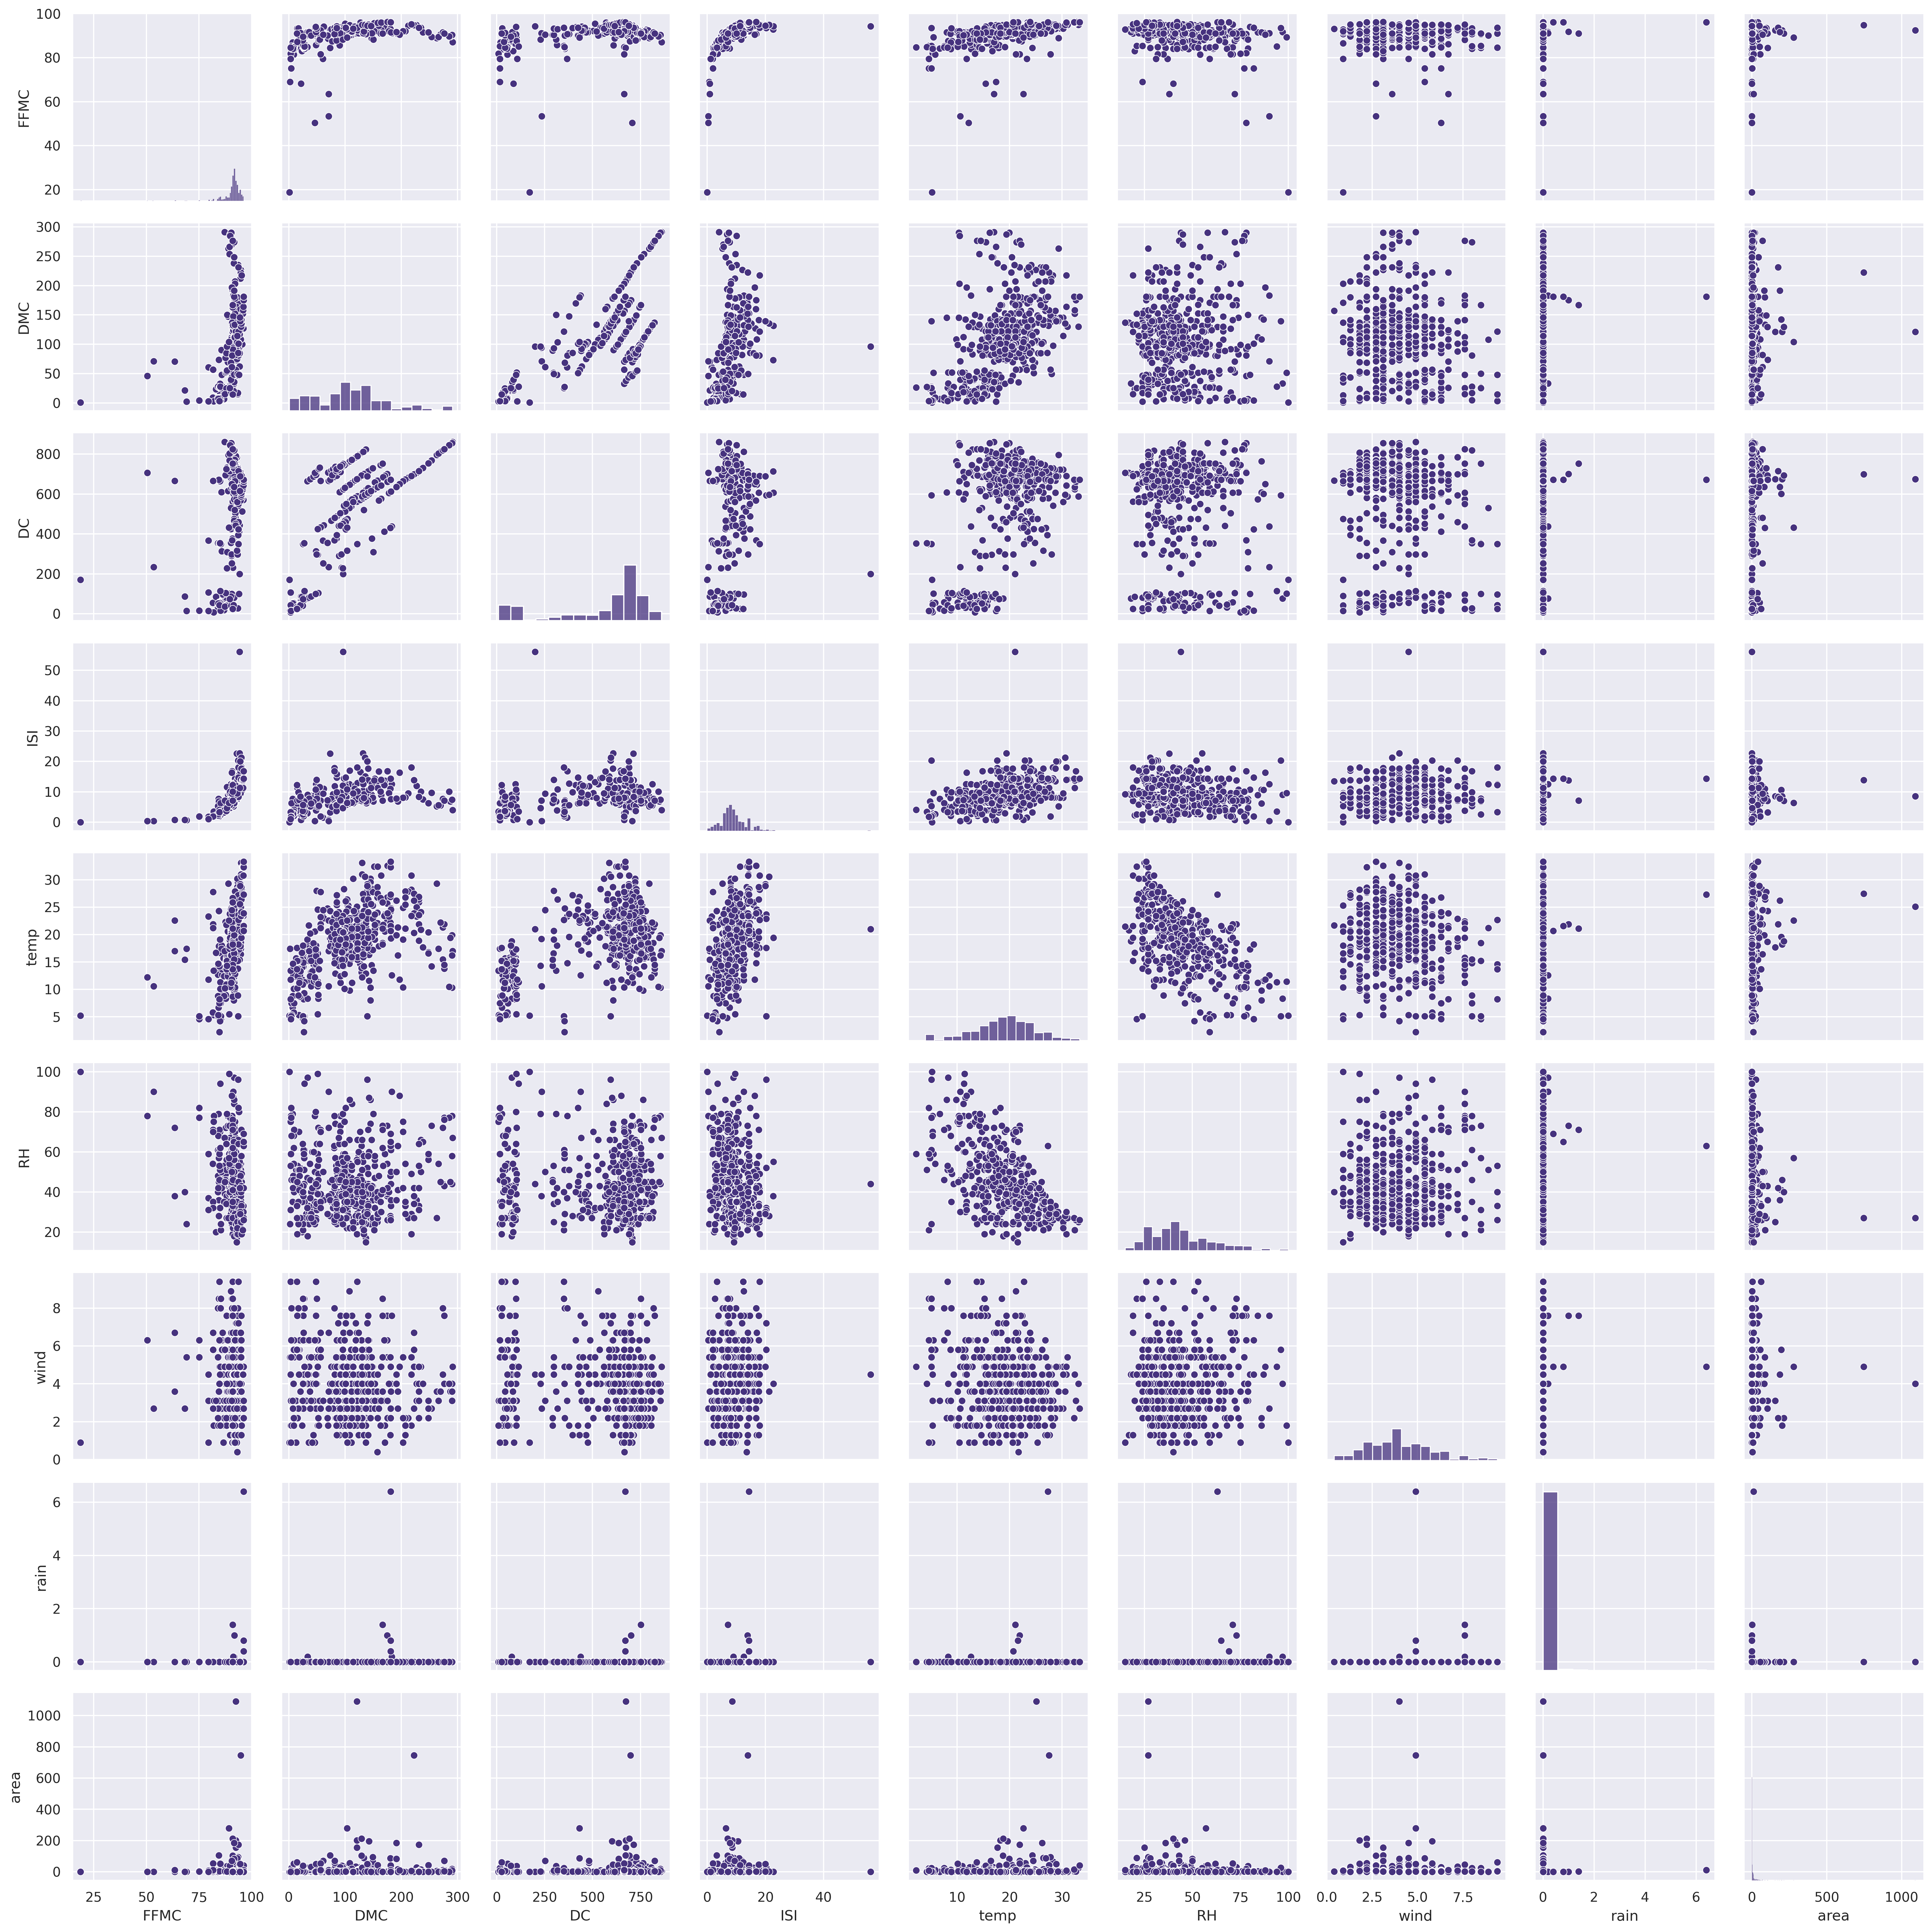

In [91]:
sns.pairplot(df2)
plt.tight_layout()
plt.show()